In [40]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt("Datos/data_to_fit.txt", skiprows=1)
X = data[:,0]
Y = data[:,1]
sigma_y = data[:,2]

def model_A(x, params):
    y = params[0] + params[1] * x + params[2] * x**2
    return y

def model_B(x, params):
    y = params[0]*(np.exp(-0.5*(x - params[1])**2 / params[2]**2))
    return y

def loglike_A(x, y, sigma_y, params):
    n_obs = len(y)
    L = 0.0
    for i in range(n_obs):
        L += -0.5 * (y[i] - model_A(x[i], params))**2/sigma_y[i]**2
    return L

def loglike_B(x, y, sigma_y, params):
    n_obs = len(y)
    L = 0.0
    for i in range(n_obs):
        L += -0.5 * (y[i] - model_B(x[i], params))**2/sigma_y[i]**2
    return L

In [62]:
def metropolis(N):
    params = [-12,0,0]
    p = loglike_A(X, Y, sigma_y, params)
    new_params = np.zeros((N, 3))
    for i in range(N):
        params_n = params + np.random.normal(0, 0.05, 3)
        p_n = loglike_A(X, Y, sigma_y, params_n)
        u = np.random.rand()
        if u < min(1, np.exp(p_n - p)):
            p = p_n
            params = params_n
        new_params[i] = params
    return np.array(new_params)

N = 50000
params_A = metropolis(N)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in exp
  if __name__ == '__main__':


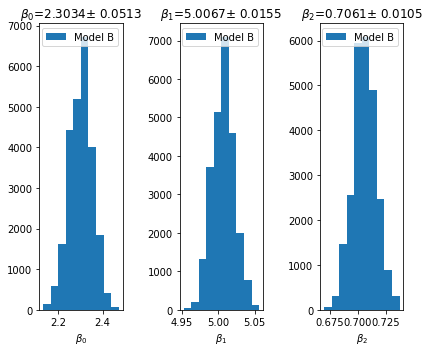

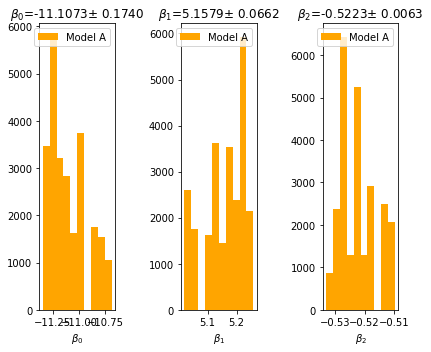

In [69]:
plt.figure(figsize=(6,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.hist(params_B[int(N/2):int(N),i],label='Model B')
    plt.title(r'$\beta_%1.0f $='%i+'%0.4f' %np.mean(params_B[int(N/2):int(N),i]) + r'$\pm$ %0.4f' %np.std(params_B[int(N/2):int(N),i]))
    plt.xlabel(r'$\beta_%1.0f $'%i)
    plt.legend()
    plt.tight_layout()
#plt.savefig('ajuste_bayes_mcmc.png')
plt.show()

plt.figure(figsize=(6,5))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.hist(params_A[int(N/2):int(N),i],label='Model A',color='orange')
    plt.title(r'$\beta_%1.0f $='%i+'%0.4f' %np.mean(params_A[int(N/2):int(N),i]) + r'$\pm$ %0.4f' %np.std(params_A[int(N/2):int(N),i]))
    plt.xlabel(r'$\beta_%1.0f $'%i)
    plt.legend()
    plt.tight_layout()
#plt.savefig('ajuste_bayes_mcmc.png')
plt.show()

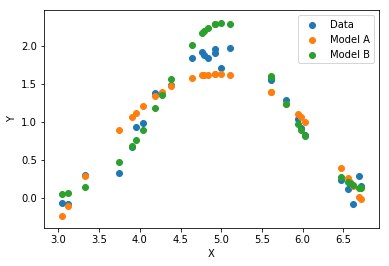

In [70]:
plt.scatter(X, Y, label='Data')
plt.scatter(X, model_A(X,np.mean(params_A[int(N/2):int(N),:],axis=0)),label='Model A')
plt.scatter(X, model_B(X,np.mean(params_B[int(N/2):int(N),:],axis=0)),label='Model B')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.show()